An example of a training a feed-fordward neural network with hidden layer. 

In [2]:
%matplotlib inline
import numpy as np
import NeuralNetworkDrawer as nnd
import matplotlib.pyplot as plt

#Training data for network: a && (b || c)
#Note this is not the complete logic table!
X=np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])

y=np.array([[0],[0],[1],[1]])

In [3]:
#Number of training epochs 
epochs=100000

#randomly initialize weights between input -> hidden layer -> output
w0 = 2*np.random.random((3,4)) - 1 #3 inputs to 4 hiddent layers
w1 = 2*np.random.random((4,1)) - 1 #4 hidden layers to 1 output

print(w0)
print(w1)

[[-0.66006977  0.85466918  0.33210106  0.58298332]
 [ 0.6854305   0.31845863  0.38747178 -0.70569691]
 [ 0.34574173  0.44867134  0.10142115  0.89227917]]
[[ 0.81802469]
 [-0.45068745]
 [-0.97859485]
 [-0.01937703]]


In [4]:
def sigmoid(x):
    #logistic or sigmoid activation function
    return 1/(1+np.exp(-x))

def dsigmoid(x):
    #derivative of activation function
    return x*(1-x)

Error= 0.511528605325


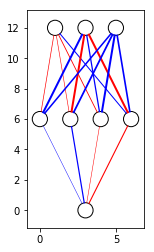

Error= 0.50100071693


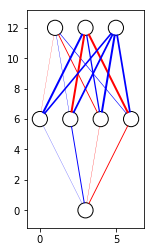

Error= 0.497197116386


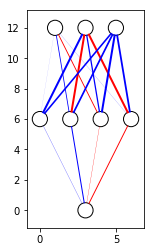

Error= 0.478427269354


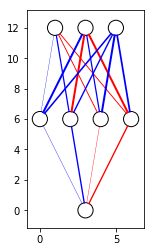

Error= 0.319225396918


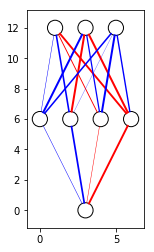

Error= 0.0022334073831


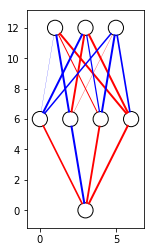

In [10]:
#Store training errors vs iteration for plotting later
errx=[]
erry=[]

#Train the network
for i in range(epochs):
    #feed forward
    l0 = X
    l1 = sigmoid(np.dot(l0,w0))
    l2 = sigmoid(np.dot(l1,w1))
    
    # backprop
    l2_err = y - l2
    l2_delta = l2_err*dsigmoid(l2)
    
    l1_err = l2_delta.dot(w1.T)
    l1_delta = l1_err*dsigmoid(l1)
    
    # update weights
    w1 += l1.T.dot(l2_delta)
    w0 += l0.T.dot(l1_delta)
    
    #Periodically print current error and draw the network
    if ((i%100)==0 and i<500) or i==epochs-1:
        print("Error=",np.mean(np.abs(l2_err)))
        network = nnd.NeuralNetwork()
        network.add_layer(1,4*sigmoid(w1)-2)
        network.add_layer(4,4*sigmoid(w0)-2)
        network.add_layer(3)
        network.draw(save=False, outfile="anim/plt%04d.png"%i)
        
    errx.append(i)
    erry.append(np.mean(np.abs(l2_err)))
    

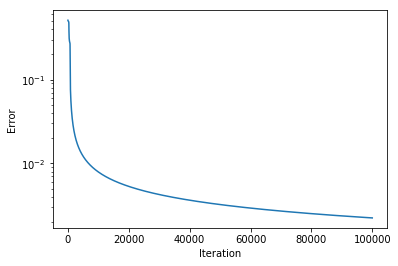

In [11]:
#Plot the Error vs Iteration
plt.plot(errx,erry)
plt.yscale('log')
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.show()

In [12]:
#Test examples for trained inputs
def testNet(X,ytrue):
    l0=X
    l1=sigmoid(np.dot(l0,w0))
    l2=sigmoid(np.dot(l1,w1))
    print("Network returned %f, expected %d."%(l2,ytrue))
    #return l2

testNet([0,0,1],0)
testNet([0,1,1],0)
testNet([1,1,1],1)
testNet([1,0,1],1)

Network returned 0.000934, expected 0.
Network returned 0.003478, expected 0.
Network returned 0.997331, expected 1.
Network returned 0.998147, expected 1.


In [13]:
#Test examples for extrapolated inputs
testNet([0,0,0],0)
testNet([0,1,0],0)
testNet([1,1,0],1)
testNet([1,0,0],0)

Network returned 0.374737, expected 0.
Network returned 0.007269, expected 0.
Network returned 0.999396, expected 1.
Network returned 0.999948, expected 0.
